# American Sign Language Recognition

### Review II- ML Prediction Models

Sonali Shripad Shanbhag (19BDS0114) and Harsh Sharma (19BDS0139)

### 1. Import required libraries and packages

In [25]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import cv2
import pandas as pd
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
import skimage
from skimage.transform import resize
import tensorflow as tf
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
from tqdm import tqdm
import cv2
import skimage
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### 2. Read dataset

In [2]:
train_dir = "C:\\Users\\sonali\\Desktop\\asl-dataset\\asl_alphabet_train\\asl_alphabet_train\\"
test_dir = "C:\\Users\\sonali\\Desktop\\asl-dataset\\asl_alphabet_test\\asl_alphabet_test\\"
train_len = 2900
image_size=50

### 3. Label the dataset

In [3]:
def get_data(folder):
    X = np.empty((train_len, image_size, image_size, 3), dtype = np.float32)
    y = np.empty((train_len), dtype = int)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            if folderName in ['B']:
                label = 1
            if folderName in ['C']:
                label = 2
            if folderName in ['D']:
                label = 3
            if folderName in ['E']:
                label = 4
            if folderName in ['F']:
                label = 5
            if folderName in ['G']:
                label = 6
            if folderName in ['H']:
                label = 7
            if folderName in ['I']:
                label = 8
            if folderName in ['J']:
                label = 9
            if folderName in ['K']:
                label = 10
            if folderName in ['L']:
                label = 11
            if folderName in ['M']:
                label = 12
            if folderName in ['N']:
                label = 13
            if folderName in ['O']:
                label = 14
            if folderName in ['P']:
                label = 15
            if folderName in ['Q']:
                label = 16
            if folderName in ['R']:
                label = 17
            if folderName in ['S']:
                label = 18
            if folderName in ['T']:
                label = 19
            if folderName in ['U']:
                label = 20
            if folderName in ['V']:
                label = 21
            if folderName in ['W']:
                label = 22
            if folderName in ['X']:
                label = 23
            if folderName in ['Y']:
                label = 24
            if folderName in ['Z']:
                label = 25
            if folderName in ['del']:
                label = 26
            if folderName in ['nothing']:
                label = 27
            if folderName in ['space']:
                label = 28
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (image_size, image_size, 3))
                    img_arr = np.asarray(img_file).reshape((-1, image_size, image_size, 3))
                   
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y
                             

letters, labels= get_data(train_dir)

print("Shape", letters.shape)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 80.34it/s]

Shape (2900, 50, 50, 3)


In [4]:
label_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']

### 4. Split into train and test datasets; independent and dependent variables

In [5]:
import tensorflow as tf

X_train, X_test, y_train, y_test = train_test_split(letters, labels, test_size=0.3, random_state=42)

X_valid, X_train = X_train[:600] / 255., X_train[600:] / 255.
y_valid, y_train = y_train[:600], y_train[600:]
X_test = X_test / 255.
print("Shape of X_test ", X_test.shape)
print("Shape of X_train ", X_train.shape)

Shape of X_test  (870, 50, 50, 3)
Shape of X_train  (1430, 50, 50, 3)


### 5. Image Preprocessing

Reshape the images since sklearn expects the input to be a 2D array

In [6]:
nsamples, nx, ny, nrgb = X_train.shape
x_train2 = X_train.reshape((nsamples,nx*ny*nrgb))
nsamples, nx, ny, nrgb = X_test.shape
x_test2 = X_test.reshape((nsamples,nx*ny*nrgb))

### 6. Apply the ML Models for Classification

##### i. Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfm=RandomForestClassifier(n_estimators=10,oob_score=True,n_jobs=-1, random_state=20,max_features=None,min_samples_leaf=2)
rfm.fit(x_train2,y_train)
rfm_ypred=rfm.predict(x_test2)
rfm_acc = sklearn.metrics.accuracy_score(y_test,rfm_ypred)
print("Random Forest Accuracy: ")
print(rfm_acc*100,"%")

Random Forest Accuracy: 
97.70114942528735 %


##### ii. Logistic Regression

In [29]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train2,y_train)
lr_ypred=lr.predict(x_test2)
acc_lr = sklearn.metrics.accuracy_score(y_test, lr_ypred)
print("Logistic Regression Accuracy: ")
print(acc_lr*100,"%")

Logistic Regression Accuracy: 
23.908045977011493 %


##### iii. Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train2,y_train)
nb_ypred=nb.predict(x_test2)
nb_acc = sklearn.metrics.accuracy_score(y_test,nb_ypred)
print("Naive Bayes Accuracy: ")
print(nb_acc*100,"%")

Naive Bayes Accuracy: 
89.19540229885058 %


##### iv. Stochastic Gradient Descent

In [10]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='modified_huber',shuffle=True, random_state=15)
sgd.fit(x_train2,y_train)
sgd_ypred=sgd.predict(x_test2)
sgd_acc = sklearn.metrics.accuracy_score(y_test,sgd_ypred)
print("Stochastic Gradient Descent Accuracy: ")
print(sgd_acc*100,"%")

Stochastic Gradient Descent Accuracy: 
40.804597701149426 %


##### v. K-Nearest Neighbour

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train2,y_train)
knn_ypred=knn.predict(x_test2)
knn_acc = sklearn.metrics.accuracy_score(y_test,knn_ypred)
print("K-Nearest Neighbour Accuracy: ")
print(knn_acc*100,"%")

K-Nearest Neighbour Accuracy: 
95.7471264367816 %


#### vi. Decision Tree 

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=40,random_state=18,max_features=None, min_samples_leaf=8)
dtree.fit(x_train2,y_train)
dtree_ypred=dtree.predict(x_test2)
dtree_acc = sklearn.metrics.accuracy_score(y_test,dtree_ypred)
print("Decision Tree Accuracy: ")
print(dtree_acc*100,"%")

Decision Tree Accuracy: 
92.52873563218391 %


#### vii. Support Vector Machine

In [27]:
from sklearn.svm import SVC 
svm=SVC(kernel="linear",C=100,random_state=None)
svm.fit(x_train2,y_train)
svm_ypred=svm.predict(x_test2)
svm_acc = sklearn.metrics.accuracy_score(y_test,svm_ypred)
print("Support Vector Machine Accuracy: ")
print(svm_acc*100,"%")

Support Vector Machine Accuracy: 
82.06896551724138 %


### 7. Test with test images (Optional)

In [21]:
img_path="C:\\Users\\sonali\\Desktop\\asl-dataset\\asl_alphabet_test\\asl_alphabet_test\\G_test.jpg"

img_arr=cv2.imread(img_path)
img_arr=cv2.resize(img_arr,(50,50))

nx, ny, nrgb = img_arr.shape
img_arr2 = img_arr.reshape(1,(nx*ny*nrgb))

classes = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']
ans=rfm.predict(img_arr2)

print(label_names[ans[0]])

G


### 8. Comparative Analysis of Results (Visualization)

Classification models in descending order of Accuracy:


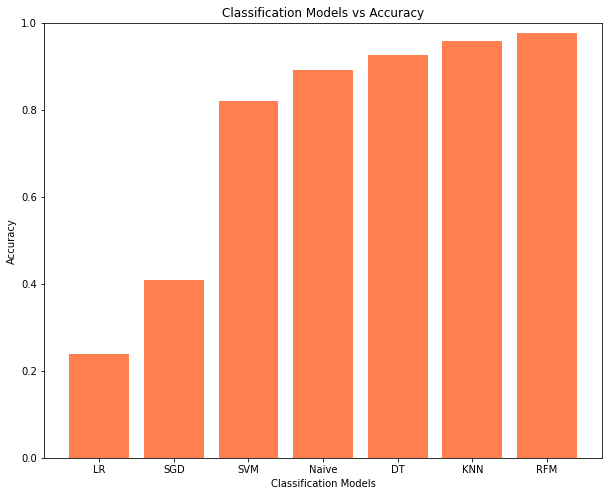

In [41]:
accuracies = {"LR": acc_lr,  
             "Naive": nb_acc, 
             "SGD": sgd_acc,
             "KNN": knn_acc, 
             "DT": dtree_acc,
            "RFM": rfm_acc,
            "SVM": svm_acc
             }

lists = sorted(accuracies.items(), key=lambda x: x[1]*100) # sorted by key, return a list of tuples
print("Classification models in descending order of Accuracy:")
sorted(accuracies.items(), key=lambda x: x[1],reverse=True)

plt.figure(figsize=(10,8))
plt.bar(*zip(*lists), color="coral")
plt.ylim(0,1)
plt.title('Classification Models vs Accuracy')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.show()

In [68]:
accuracies

{'LR': 0.23908045977011494,
 'Naive': 0.8919540229885058,
 'SGD': 0.40804597701149425,
 'KNN': 0.957471264367816,
 'DT': 0.9252873563218391,
 'RFM': 0.9770114942528736,
 'SVM': 0.8206896551724138}

### 9. Classification Report for best models

In [46]:
from sklearn.metrics import classification_report
targetNames= label_names

In [51]:
print('For Random Forest')
print(classification_report(y_test, rfm_ypred, target_names=targetNames))

For Random Forest
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        24
           B       1.00      1.00      1.00        28
           C       1.00      1.00      1.00        38
           D       1.00      1.00      1.00        25
           E       1.00      1.00      1.00        33
           F       1.00      1.00      1.00        29
           G       1.00      1.00      1.00        31
           H       1.00      1.00      1.00        27
           I       1.00      1.00      1.00        25
           J       0.95      1.00      0.97        35
           K       1.00      0.92      0.96        26
           L       0.90      1.00      0.95        27
           M       1.00      1.00      1.00        29
           N       1.00      1.00      1.00        31
           O       1.00      1.00      1.00        29
           P       1.00      1.00      1.00        36
           Q       1.00      1.00      1.00        31
         

In [48]:
print('For Decision Tree')
print(classification_report(y_test, dtree_ypred, target_names=targetNames))

For Decision Tree
              precision    recall  f1-score   support

           A       0.96      0.92      0.94        24
           B       0.96      0.96      0.96        28
           C       1.00      1.00      1.00        38
           D       0.71      1.00      0.83        25
           E       1.00      0.76      0.86        33
           F       0.96      0.90      0.93        29
           G       1.00      1.00      1.00        31
           H       1.00      1.00      1.00        27
           I       1.00      1.00      1.00        25
           J       0.88      0.86      0.87        35
           K       0.81      0.85      0.83        26
           L       0.79      0.96      0.87        27
           M       0.85      0.97      0.90        29
           N       1.00      0.97      0.98        31
           O       1.00      1.00      1.00        29
           P       0.97      1.00      0.99        36
           Q       1.00      0.97      0.98        31
         

In [49]:
print('For SVM')
print(classification_report(y_test, svm_ypred, target_names=targetNames))

For SVM
              precision    recall  f1-score   support

           A       0.92      0.96      0.94        24
           B       1.00      0.89      0.94        28
           C       1.00      1.00      1.00        38
           D       0.96      0.88      0.92        25
           E       0.89      1.00      0.94        33
           F       0.18      0.17      0.18        29
           G       1.00      1.00      1.00        31
           H       0.92      0.89      0.91        27
           I       1.00      1.00      1.00        25
           J       1.00      0.97      0.99        35
           K       0.56      0.73      0.63        26
           L       0.00      0.00      0.00        27
           M       0.45      0.86      0.59        29
           N       1.00      1.00      1.00        31
           O       0.74      0.90      0.81        29
           P       1.00      1.00      1.00        36
           Q       1.00      1.00      1.00        31
           R       

In [50]:
print('For Naive Bayes')
print(classification_report(y_test, nb_ypred, target_names=targetNames))

For Naive Bayes
              precision    recall  f1-score   support

           A       0.67      1.00      0.80        24
           B       1.00      0.86      0.92        28
           C       1.00      0.97      0.99        38
           D       1.00      0.76      0.86        25
           E       0.89      1.00      0.94        33
           F       0.94      0.55      0.70        29
           G       1.00      1.00      1.00        31
           H       1.00      0.85      0.92        27
           I       1.00      1.00      1.00        25
           J       1.00      0.91      0.96        35
           K       1.00      1.00      1.00        26
           L       1.00      0.78      0.88        27
           M       0.57      0.97      0.72        29
           N       1.00      1.00      1.00        31
           O       0.93      0.90      0.91        29
           P       0.92      1.00      0.96        36
           Q       1.00      0.94      0.97        31
           

In [52]:
print('For KNN')
print(classification_report(y_test, knn_ypred, target_names=targetNames))

For KNN
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        24
           B       0.96      0.96      0.96        28
           C       1.00      1.00      1.00        38
           D       1.00      0.88      0.94        25
           E       0.91      0.97      0.94        33
           F       0.88      0.97      0.92        29
           G       0.97      1.00      0.98        31
           H       1.00      0.89      0.94        27
           I       1.00      1.00      1.00        25
           J       1.00      1.00      1.00        35
           K       0.90      1.00      0.95        26
           L       1.00      0.96      0.98        27
           M       0.97      0.97      0.97        29
           N       1.00      1.00      1.00        31
           O       0.91      1.00      0.95        29
           P       1.00      1.00      1.00        36
           Q       1.00      1.00      1.00        31
           R       